### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
np.random.seed(42) 

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 

$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$


`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

> Population mean height

In [231]:
full_data.head(2)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249


In [232]:
f' Populaition\'s mean height {full_data.height.mean()}'

" Populaition's mean height 67.59748697307934"

In [233]:
f'Populaiton\'s height standard deviation: {full_data.height.std()}'

"Populaiton's height standard deviation: 3.119433206550342"

> 

In [234]:
sample1 = full_data.sample(5)

In [235]:
sample1_mean = sample1.height.mean()
f'Sample1 mean height: {sample1_mean}' 

'Sample1 mean height: 67.88234252049084'

> sampling distributuon

In [236]:
sample_means = []
for _ in range(10000):
    sample2 = sample1.sample(5, replace=True)
    sample_means.append(sample2['height'].mean()) 

In [237]:
# sampled_means_mean = np.mean(sample_means)
# f'mean of sample means: {sampled_means_mean}'

In [238]:
sampled_means_std = np.std(sample_means)
f'standard deviation of sample means: {sampled_means_std}' 

'standard deviation of sample means: 1.141357351999374'

> Confidence Interval - $95$%

In [239]:
sample_means = np.array(sample_means)
ci_low, ci_up = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)
ci_low, ci_up

(65.778613213319204, 70.186632646628397)

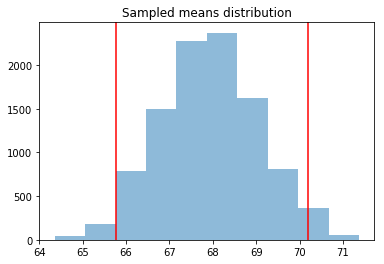

In [240]:
plt.hist(sample_means, alpha=.5);
plt.title('Sampled means distribution')
plt.axvline(ci_up, color='r')
plt.axvline(ci_low, color='r');

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

> We would use the  np.random.normal() to simulate the distribution of our null hypothesis..

$$h_0: \mu = 67.60$$

In [241]:
null_mean =67.60
null_vals = np.random.normal(null_mean, sampled_means_std, 10000)
null_vals 

array([ 67.33035518,  63.81682811,  66.52346646, ...,  68.24724889,
        68.09428382,  70.70045007])

In [242]:
sample1_mean

67.882342520490838

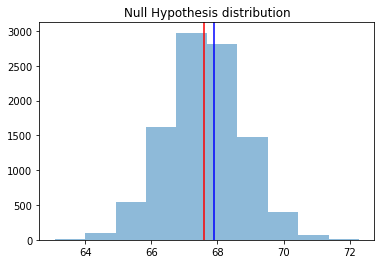

In [243]:
plt.title('Null Hypothesis distribution');
plt.hist(null_vals, alpha=.5)
plt.axvline(x=sample1_mean, color = 'b');# where our sample mean falls on null dist
plt.axvline(null_mean, color='r'); # where our null mean falls on its distribution

> Test out null hypothesis is true .. we will do this based on our alternative hypotheis..  

$$H_1: \mu \neq 67.60$$

In [244]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean() 

# probability of a statistic higher than observed
prob_more_extreme_high = (null_vals > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) < null_vals).mean()
 
pval = prob_more_extreme_low + prob_more_extreme_high
pval 

1.0091999999999999

ull_mean = 67.60  
#### this is another way to compute the standard deviation of the sampling distribution theoretically  
> std_sampling_dist = full_data.height.std()/np.sqrt(5)  
    num_sims = 10000

> null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)  
> low_ext = (null_mean - (sample1.height.mean() - null_mean))  
    high_ext = sample1.height.mean()  


> (null_sims > high_ext).mean() + (null_sims < low_ext).mean()

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [245]:
sample_300 = full_data.sample(300)

In [246]:
sample_300_mean = sample_300.height.mean()


In [247]:
f'Sample 300 mean: {sample_300_mean}' 

'Sample 300 mean: 67.68876795103893'

In [248]:
resampled_300 = []
num_sims = 10000 
for _ in range(num_sims): 
    sample3 = sample_300.sample(300, replace=True)
    resampled_300.append(sample3.height.mean()) 

In [249]:
resampled_300_mean = np.mean(resampled_300)
f'resampled_300_mean : {resampled_300_mean}' 

'resampled_300_mean : 67.68782648802879'

In [250]:
resampled_300_std = np.std(resampled_300)
f'resampled_300_std : {resampled_300_std}' 

'resampled_300_std : 0.18108485974118899'

> Generate a $95$% confidence interval

In [251]:
ci_low, ci_high = np.percentile(resampled_300,2.5 ), np.percentile(resampled_300, 97.5)

> PLot samlpled_mean_300 distribution

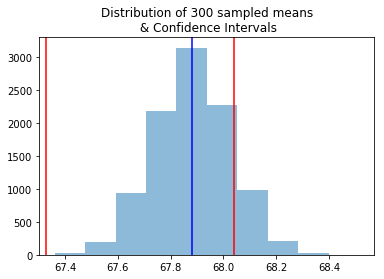

NB: Red lines are confidence intervals an blue line is observed sample-mean 


In [281]:
plt.hist(sampled_300, alpha=.5)
plt.title('Distribution of 300 sampled means\n & Confidence Intervals')
plt.axvline(sampled_300_mean, color= 'b')
plt.axvline(ci_low, color='r')
plt.axvline(ci_high, color = 'r')
plt.show()
print('NB: Red lines are confidence intervals an blue line is observed sample-mean ')

>  Generate and Plot distribution of null values

In [270]:
num_sims = 10000 
null_values = np.random.normal(null_mean, resampled_300_std, num_sims)

In [271]:
f'sample_300_mean: {sample_300_mean}'

'sample_300_mean: 67.68876795103893'

> Calculate p_value for our null hypothesis for both sides using the alternative hypothesis

$$H_1: \mu \neq 67.60$$

In [274]:
obs_mean = sample_300_mean

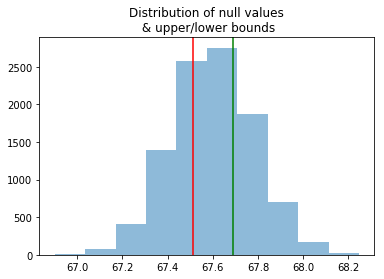

uper bound: 67.688767951 	lower bound: 67.511232049


In [292]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.title('Distribution of null values\n & upper/lower bounds')
plt.hist(null_values, alpha=.5);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'g'); # where our sample mean falls on null dist
plt.show()
print('uper bound:',upper_bound, '\t' 'lower bound:' ,lower_bound)

In [299]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic lower than observed
prob_more_extreme_low = (null_values < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (null_values > upper_bound).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  
# With such a large sample size, our sample mean that is super
# close will be significant at an alpha = 0.1 level.

0.62549999999999994

`5.` Reflect on what happened by answering the final quiz in this concept.